In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("chargeback_frauds.csv").drop("Unnamed: 0", axis=1)
df.head()

,Card Number,Date,Amount,CBK
0,536518******2108,2015-05-01 00:01:54,36.54,No
1,536518******2108,2015-05-01 00:03:46,36.54,No
2,453211******1239,2015-05-01 00:08:50,69.00,No
3,548827******1705,2015-05-01 00:27:00,193.43,No
4,531681******9778,2015-05-01 01:32:46,132.00,No


In [111]:
df.dtypes

Card Number     object
Date            object
Amount         float64
CBK             object
dtype: object

In [112]:
df["Date"] = pd.to_datetime(df["Date"])
df["CBK Num"] = df["CBK"].apply(lambda cbk: int(cbk == "Yes"))

Text(0.5, 0, 'Chargeback?')

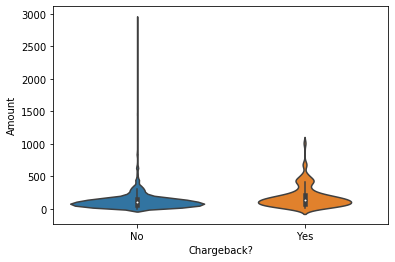

In [113]:
sns.violinplot(data=df, x="CBK", y="Amount")
plt.xlabel("Chargeback?")

TypeError: '<' not supported between instances of 'Text' and 'Text'

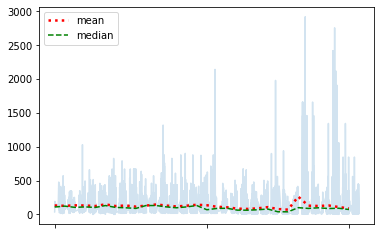

In [115]:
for cbk in df["CBK"].unique():
    copy = df[df["CBK"] == cbk]
    
    copy["Day"] = copy["Date"].astype(str).apply(lambda d: d.split(" ")[0])
    copy["Day"] = pd.to_datetime(copy["Day"])
    means = copy.groupby("Day")["Amount"].mean()
    medians = copy.groupby("Day")["Amount"].median()

    x = copy["Day"]
    y = copy["Amount"]

    x = means.index
    custom_ticks = [x[0], x[len(x)//2], x[-1]]
    custom_tick_labels = [str(x[0]), '', str(x[-1])]

    x = copy["Date"]
    plt.plot(x, y, alpha=0.2)
    plt.plot(means.index, means, color="red", linewidth=2.5, label = "mean", linestyle = "dotted")
    plt.plot(medians.index, medians, color="green", linestyle="dashed", label = "median")
    plt.legend()
    plt.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=False)
    plt.xticks(custom_ticks, custom_tick_labels)
    ytick_labels = plt.yticks()[1]
    modified_ytick_labels = [f"${label}" for label in ytick_labels]
    plt.yticks(ytick_labels, modified_ytick_labels)
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.title(f"Mean Transaction Amounts Over Time (CBK = {cbk})")
    plt.show()

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

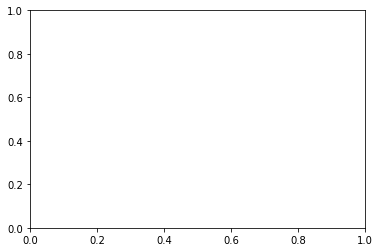

In [128]:
plt.yticks()[0]